# Mathematical Underpinnings - Lab 2

## Task 1

### a)

In our task we know $a^* = 1$.

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}((a-1)X - \epsilon)^2 = (a-1)^2\mathbb{E}(X^2) + \mathbb{E}(\epsilon^2) - 2(a-1)\mathbb{E}(X\epsilon)=$$

$$=(a-1)^2(Var[X] - \mathbb{E}[X]) + (Var[\epsilon] - \mathbb{E}[\epsilon])- 2(a-1)\mathbb{E}(X)\mathbb{E}(\epsilon) = (a-1)^2 + \sigma^2$$

$$argmin_{a} \mathbb{E} \mathcal{L}(f(X), Y) = 1$$

$$min_{a} \mathcal{L}(f(X), Y) = \sigma^2$$



In [1]:
def population_risk(a, sigma_eps):
    return (a-1) ** 2 + sigma_eps ** 2

### b)

In [2]:
import numpy as np
np.random.seed(123)

# sampling
n = 50
sigma = 1
a0 = 1

x = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, sigma, n)
y = a0 * x + epsilon

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [3]:
def empirical_risk(a, x, y):
    return sum([(a*x[i] - y[i]) ** 2 for i in range(len(x))]) / len(x)

### c)

In [4]:
N = 200
a_seq = np.linspace(0, 2, N)
empirical_risk_seq = [empirical_risk(a, x, y) for a in a_seq]
population_risk_seq = [population_risk(a, 1) for a in a_seq]

In [5]:
print(f'Population risk minimizer: {a0}')
print(f'Minimal value of population risk: {population_risk(a0, sigma)}')

Population risk minimizer: 1
Minimal value of population risk: 1


In [6]:
from scipy.optimize import minimize
from functools import partial

def empirical_risk_x_y(x, y):
    return partial(empirical_risk, x=x, y=y)

result_minimization = minimize(empirical_risk_x_y(x, y), x0=np.array([0]))

In [7]:
print(f'Empirical risk minimizer: {result_minimization.x[0]}')
print(f'Minimal value of empirical risk: {result_minimization.fun}')

Empirical risk minimizer: 0.9242157189434187
Minimal value of empirical risk: 1.1238154693511444


In [8]:
print(f'Population risk computed for ERM: {population_risk(result_minimization.x[0], sigma)}')

Population risk computed for ERM: 1.005743257255263


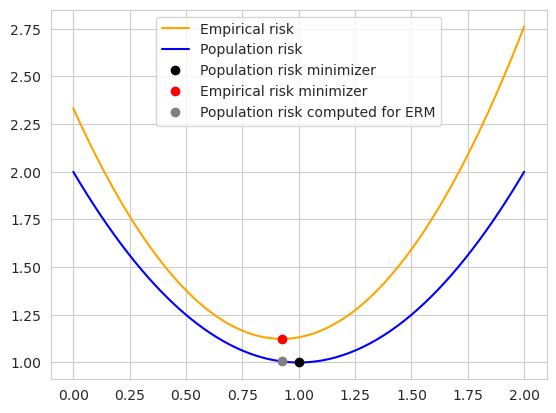

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.plot(a_seq, empirical_risk_seq, label='Empirical risk', c='orange')
plt.plot(a_seq, population_risk_seq, label='Population risk', c='blue')

plt.plot(a0, population_risk(a0, sigma), 'o', label='Population risk minimizer', c='black')
plt.plot(result_minimization.x[0], result_minimization.fun, 'o', label='Empirical risk minimizer', c='red')
plt.plot(result_minimization.x[0], population_risk(result_minimization.x[0], sigma), 'o', label='Population risk computed for ERM', c='grey')

plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [10]:
# excess risk

def excess_risk(a0, a_hat, sigma):
    return population_risk(a_hat, sigma) - population_risk(a0, sigma)

In [11]:
print(f'Excess risk: {excess_risk(a0, result_minimization.x[0], sigma)}')

Excess risk: 0.0057432572552629235


In [12]:
# simulations with fixed sample size

L = 200
excess_risk_seq = np.zeros(L)

for l in range(L):
    x = np.random.normal(0, 1, n)
    epsilon = np.random.normal(0, sigma, n)
    y = a0 * x + epsilon
    
    result_minimization = minimize(empirical_risk_x_y(x, y), x0=np.array([0]))
    excess_risk_seq[l] = excess_risk(a0, result_minimization.x[0], sigma)

In [13]:
print(f'Mean excess risk: {np.mean(excess_risk_seq)}')

Mean excess risk: 0.02471740907346522


In [14]:
def excess_risk_simulation(n, L, a0, sigma):
    excess_risk_seq = np.zeros(L)
    for l in range(L):
        x = np.random.normal(0, 1, n)
        epsilon = np.random.normal(0, sigma, n)
        y = a0 * x + epsilon

        result_minimization = minimize(empirical_risk_x_y(x, y), x0=np.array([0]))
        excess_risk_seq[l] = excess_risk(a0, result_minimization.x[0], sigma)
    return excess_risk_seq

In [15]:
n_seq = np.arange(25, 1000, 25)
L = 200

In [16]:
from multiprocessing import Pool
import os

with Pool(os.cpu_count()) as pool:
    excess_risk_seq = pool.map(
        partial(excess_risk_simulation, L=L, a0=a0, sigma=sigma),
        n_seq
    )

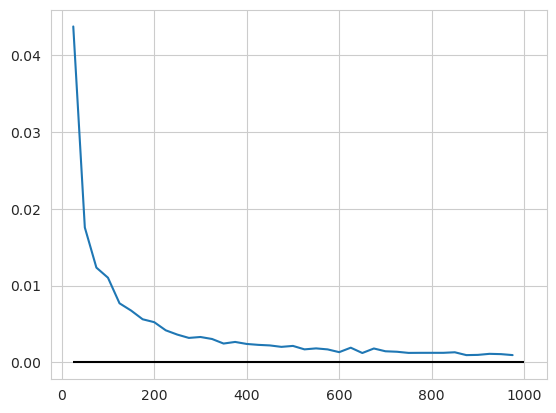

In [17]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(n_seq, np.mean(np.array(excess_risk_seq), axis=1))
plt.hlines(0, 25, 1000, color='black')
plt.show()